In [1]:
#How many Carrots were sold according to this Dataset?

In [141]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap as Basemap


df = pd.read_excel (r'sampledatafoodsales.xlsx', sheet_name='FoodSales')

In [142]:
# Data 
print (df)

     OrderDate Region         City  Category         Product  Quantity  \
0   2020-01-01   East       Boston      Bars          Carrot        33   
1   2020-01-04   East       Boston  Crackers     Whole Wheat        87   
2   2020-01-07   West  Los Angeles   Cookies  Chocolate Chip        58   
3   2020-01-10   East     New York   Cookies  Chocolate Chip        82   
4   2020-01-13   East       Boston   Cookies       Arrowroot        38   
..         ...    ...          ...       ...             ...       ...   
239 2021-12-18   East       Boston   Cookies       Arrowroot        34   
240 2021-12-21   East       Boston   Cookies  Chocolate Chip       245   
241 2021-12-24   East       Boston  Crackers     Whole Wheat        30   
242 2021-12-27   West  Los Angeles      Bars            Bran        30   
243 2021-12-30   West  Los Angeles   Cookies  Oatmeal Raisin        44   

     UnitPrice  TotalPrice  
0         1.77       58.41  
1         3.49      303.63  
2         1.87      108.

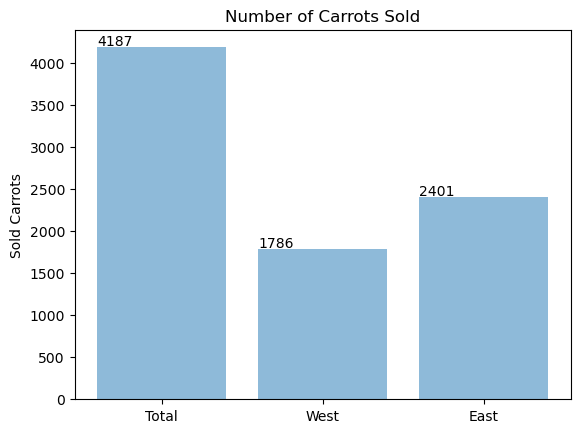

For 1.77$ per sold Carrot we earn the following Profits:
 West: 1786 Carrots sold -> 3161.22 $
 East: 2401 Carrots sold -> 4249.77 $
Total Profits: 7410.99$


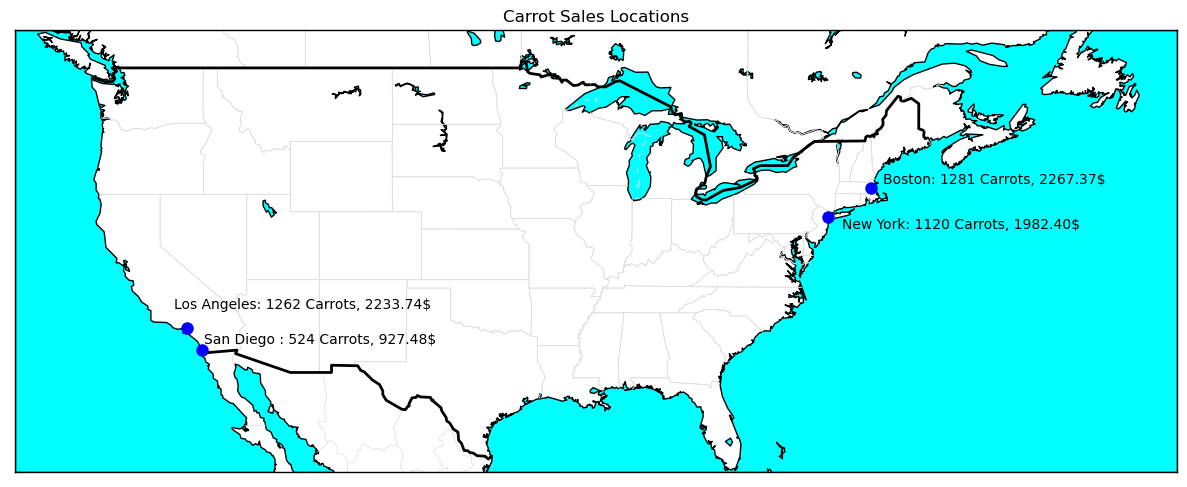

In [174]:
product = (df['Product'])
select_product = df.loc [df['Product'] == 'Carrot']



Carrots_total = np.sum (select_product['Quantity'])
Price_Carrots_total = np.sum (select_product['TotalPrice'])

west = select_product.loc [select_product['Region'] == 'West',]
west_sales = np.sum (west['Quantity'])
west_profit = np.sum (west['TotalPrice'])


east = select_product.loc [select_product['Region'] == 'East',]
east_sales = np.sum (east['Quantity'])
east_profit = np.sum (east['TotalPrice'])



x = ('Total', 'West', 'East')
y = np.arange(len(x))
numbers = [Carrots_total, west_sales, east_sales]

bar = plt.bar(y, height=numbers, align='center', alpha=0.5)
plt.xticks(y, x)
plt.ylabel('Sold Carrots')
plt.title('Number of Carrots Sold')
for bar in bar:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+20, yval)

plt.show(bar)

print ("For 1.77$ per sold Carrot we earn the following Profits:")
print(f" West: {west_sales} Carrots sold -> {float(west_profit):.2f} $")
print(f" East: {east_sales} Carrots sold -> {float(east_profit):.2f} $")
print (f"Total Profits: {float(west_profit + east_profit):.2f}$")


SD = select_product.loc [select_product['City'] == 'San Diego',]
LA = select_product.loc [select_product['City'] == 'Los Angeles',]
NY = select_product.loc [select_product['City'] == 'New York',]
BS = select_product.loc [select_product['City'] == 'Boston',]

SD_Sales = np.sum (SD['Quantity'])
SD_Profit = np.sum (SD['TotalPrice'])
LA_Sales = np.sum (LA['Quantity'])
LA_Profit = np.sum (LA['TotalPrice'])
NY_Sales = np.sum (NY['Quantity'])
NY_Profit = np.sum (NY['TotalPrice'])
BS_Sales = np.sum (BS['Quantity'])
BS_Profit = np.sum (BS['TotalPrice'])

fig = plt.figure(figsize=(15,15))

m = Basemap(projection='mill',
            llcrnrlat=25,
            urcrnrlat=51,\
            llcrnrlon=-130,
            urcrnrlon=-50,
            resolution='l')
m.drawcoastlines()
m.fillcontinents(color='white',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawstates(color='gainsboro')
m.drawcountries(linewidth=2, linestyle='solid', color='k')
plt.title("Carrot Sales Locations")

lons = [-118.1733989617287, -117.1479560078398, -71.07498194821954,-74.0114776798105,]
lats = [34.084955005647714, 32.71004659006867, 42.34883419492603, 40.720735324948635,]
x,y = m(lons, lats)
m.plot(x, y,'bo', markersize=8)

labels = [f'Los Angeles: {LA_Sales} Carrots, {float(LA_Profit):.2f}$',
          f'San Diego : {SD_Sales} Carrots, {float(SD_Profit):.2f}$',
          f'Boston: {BS_Sales} Carrots, {float(BS_Profit):.2f}$',
          f'New York: {NY_Sales} Carrots, {float(NY_Profit):.2f}$',]
x_offsets = [-100000, 20000, 90000, 100000]
y_offsets = [150000, 50000, 35000, -90000]

for label, xpt, ypt, x_offset, y_offset in zip(labels, x, y, x_offsets, y_offsets):
    plt.text(xpt+x_offset, ypt+y_offset, label)


plt.show()